# Programming Assignment - 11
---
## Name:
---

In [2]:
# Import required packages
import sklearn
import pandas as pd
from numpy import unique
from numpy import where
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift

## Question 1
---
Pick up a dataset of your choice for clustering ([UCI dataset](https://archive.ics.uci.edu/ml/datasets.php)). Apply various clustering algorithms (including k-means and spectral clustering) to this dataset and explain your observation by using insightful plots or other some other metrics.

Read [this blog](https://machinelearningmastery.com/clustering-algorithms-with-python/) for some help.

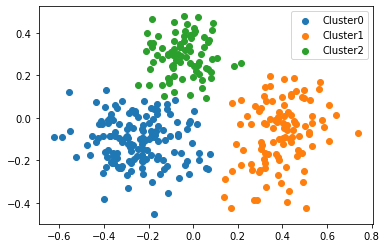

In [8]:
# spectral clustering

# define dataset
col_names = ['name','mcg','gvh','lip','chg','aac','alm1','alm2','cp'] # Short Names
X=pd.read_fwf("ecoli.data",names=col_names,sep=',')
del X['name']
del X['cp']
pca = PCA(n_components=7)
X_pca = pca.fit_transform(X)
# define the model
model = SpectralClustering(n_clusters=3)
# fit model and predict clusters
yhat = model.fit_predict(X_pca)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
 # get row indexes for samples with this cluster
 row_ix = where(yhat == cluster)
 # create scatter of these samples
 plt.scatter(X_pca[row_ix,0], X_pca[row_ix,1],label=f'Cluster{cluster}')
plt.legend()
# show the plot
plt.show()

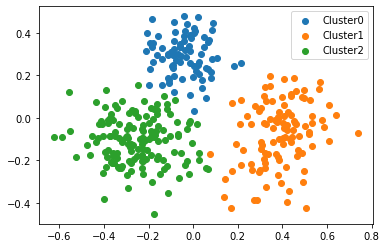

In [9]:
# k-means clustering
# define the model
model = KMeans(n_clusters=3)
# fit the model
model.fit(X_pca)
# assign a cluster to each example
yhat = model.predict(X_pca)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
 # get row indexes for samples with this cluster
 row_ix = where(yhat == cluster)
 # create scatter of these samples
 plt.scatter(X_pca[row_ix, 0], X_pca[row_ix, 1],label=f'Cluster{cluster}')
plt.legend()
# show the plot
plt.show()

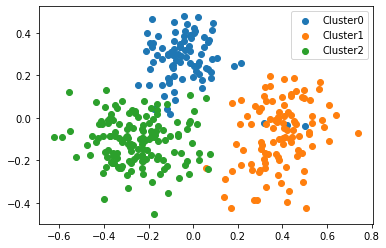

In [29]:
#agglomerative

# define the model
model = AgglomerativeClustering(n_clusters=3)
# fit model and predict clusters
yhat = model.fit_predict(X_pca)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
 # get row indexes for samples with this cluster
 row_ix = where(yhat == cluster)
 # create scatter of these samples
 plt.scatter(X_pca[row_ix, 0], X_pca[row_ix, 1],label=f'Cluster{cluster}')
plt.legend()
# show the plot
plt.show()

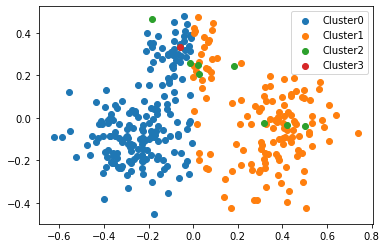

In [30]:
# mean shift clustering
model = MeanShift()
# fit model and predict clusters
yhat = model.fit_predict(X_pca)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
 # get row indexes for samples with this cluster
 row_ix = where(yhat == cluster)
 # create scatter of these samples
 plt.scatter(X_pca[row_ix, 0], X_pca[row_ix, 1],label=f'Cluster{cluster}')
plt.legend()
# show the plot
plt.show()

Prior to forming spectral clusters, I performed dimension reductionality because otherwise at X(row_i,0) part it was giving an error. I used PCA and chose 7 components. From there I performed spectral clustering, kmeans, agglomerative and mean shift. Spectral clustering and kmeans clustering show similar clusters but assigns cluster numbers differently. I chose 3 clusters for both because once I do 4 the clusters are more intertwined, these clusters show clear neighborhoods. For agglomerative I chose 3 too, but notice how parts of the cluster are inside some of the other clusters. Then I also wanted to apply a clustering for which I didnt have to input a number of clusters and mean shift provided 4, with some parts of the clusters inside other clusters. Overall, all these clusters shows there must be atleast three clusters which can mean there are three distinct groups within the dataset.